# Introduction to piezoelectric properties with lithium niobate

Continuing the study of bulk material elastic properties from the previous tutorial, let's take a look at the orientational dependence of lithium niobate, an increasingly important material in SBS.

The numerical values for the $\mathrm{LiNbO}_3$ material properties  are taken from [Rodrigues et al, JOSA B 40, D56 (2023)](https://doi.org//10.1364/JOSAB.482656).


In [4]:
%load_ext autoreload
%autoreload 3

import sys
sys.path.append("../../backend")

#import time
import numpy as np
from IPython.display import Image, display

from plotting.ipythontools import img_single, img_pair
import materials


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Stiffness tensor under crystal rotations



### The default orientation:  $y$-cut

To review, in NumBAT, the *laboratory* axes $x$, $y$ and $z$ are fixed. Propagation always occurs along the $z$ direction and the vertical direction out of the substrate is always along $y$.

The *crystal* axes of a material, denoted $X$, $Y$ and $Z$, or equivalently $\hat{c}_x$, $\hat{c}_y$, $\hat{c}_z$ can be rotated.

The material is defined in the definition json files with the crystal and laboratory axes aligned, and is thus in $y$-cut form: the crystal $\hat{c}_y$ axis points up out of the waveguide, with the crystal symmetry axis $\hat{c}_z$ lying along the propagation direction $z$.


We'll look at this for a material file describing lithium niobate. (Remember that in NumBAT, the same material can have multiple definition files to allow exact comparison with literature references that might choose slightly different values for some quantities.)

In [9]:
mat_LiNbO3 = materials.make_material("LiNbO3_2023_Rodrigues")
mat_LiNbO3_y = mat_LiNbO3  # for naming convenience later

Here is the default orientation as just described with the crystal and laboratory axes aligned.


In [10]:
pref='tmp_LiNbO3'
fnimg = mat_LiNbO3.make_crystal_axes_plot(pref+'-ycut')
img_single(fnimg, height=300)

The crystal properties show that for this orientation the two shear modes for propagation along $z$ are degenerate. Both a phase velocity of $v_p$=3.5879 km/s. 

In [5]:
print(mat_LiNbO3.elastic_properties())

Elastic properties of material LiNbO3_2023_Rodrigues
  Density:        4650.000 kg/m^3
  Ref. index:     2.2100+0.0000j 
  Crystal class:  Trigonal
  Crystal group:  3m
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[198.8300  54.6400  68.2300   7.8300   0.0000   0.0000]
     [ 54.6400 198.8300  68.2300  -7.8300   0.0000   0.0000]
     [ 68.2300  68.2300 235.7100   0.0000   0.0000   0.0000]
     [  7.8300  -7.8300   0.0000  59.8600   0.0000   0.0000]
     [  0.0000   0.0000   0.0000   0.0000  59.8600   7.8300]
     [  0.0000   0.0000   0.0000   0.0000   7.8300  72.0950]]

  Wave mode 1: v_p=7.1197 km/s,  |v_g|=7.1197 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1197] km/s
  Wave mode 2: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 1.0000  0.0000  0.0000],  v_g=[ 0.0000  0.4693  3.5879] km/s
  Wave mode 3: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[ 0.0000 -0.4693  3.5879] km/s


This degeneracy is lost if the wave vector direction in the $x$-$z$ plane is varied.

By solving the Christoffel equation as the wave vector rotates in the $x$-$z$ plane we can map out curves of the phase velocity, inverse phase velocity (or "slowness"), and the magnitude of the group velocity $|v_g(\kappa)|$.

The faint circular lines mark radial velocities at 1 km/s intervals:

In [12]:
imgdisp_y = mat_LiNbO3.plot_bulk_dispersion_all(pref+'-ycut')
img_single(imgdisp_y, height=400)

For this material, it is quite hard to see the difference between the phase and group velocity plots. That is more obvious in some other materials.

These plots can also be generated without the polarisation state markers:

In [14]:
imgdisp_yb = mat_LiNbO3.plot_bulk_dispersion_all(pref, show_poln=False)
img_single(imgdisp_yb, height=400)

### The $z$-cut orientation

Now let's rotate the starting crystal so the primary crystal symmetry axis $\hat{c}_z$ points upwards along $\hat{y}$, 
with the $\hat{c}_y$ axis along $-\hat{z}$. This corresponds to Fig. 2a in Rodrigues et al.

In [19]:
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

In [20]:
fimg = mat_LiNbO3_z.make_crystal_axes_plot(pref+'-zcut')
img_single(fimg, height=300)

With the 6-fold symmetry axis $Z$ pointing up along $y$, the dispersion cuts in the $x$-$z$ plane now display the full 6-fold symmetry associated with the trigonal structure of lithium niobate:

In [21]:
imgdisp_z = mat_LiNbO3_z.plot_bulk_dispersion_all(pref+'-zcut')
img_single(imgdisp_z, height=500)

### The $x$-cut orientation

For completeness, we can look at the $x$-cut properties:

In [22]:
mat_LiNbO3_x =  mat_LiNbO3.copy()
mat_LiNbO3_x.set_orientation('x-cut')

print(mat_LiNbO3_x.elastic_properties())

Elastic properties of material LiNbO3_2023_Rodrigues
  Density:        4650.000 kg/m^3
  Ref. index:     2.2100+0.0000j 
  Crystal class:  Trigonal
  Crystal group:  3m
   
 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[198.8300  54.6400  68.2300  -0.0000   7.8300   0.0000]
     [ 54.6400 198.8300  68.2300   0.0000  -7.8300   0.0000]
     [ 68.2300  68.2300 235.7100   0.0000   0.0000  -0.0000]
     [ -0.0000   0.0000   0.0000  59.8600   0.0000  -7.8300]
     [  7.8300  -7.8300   0.0000   0.0000  59.8600  -0.0000]
     [ -0.0000   0.0000  -0.0000  -7.8300  -0.0000  72.0950]]

  Wave mode 1: v_p=7.1197 km/s,  |v_g|=7.1197 km/s,  u_j=[ 0.0000  0.0000  1.0000],  v_g=[ 0.0000  0.0000  7.1197] km/s
  Wave mode 2: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 0.0000  1.0000  0.0000],  v_g=[-0.4693  0.0000  3.5879] km/s
  Wave mode 3: v_p=3.5879 km/s,  |v_g|=3.6185 km/s,  u_j=[ 1.0000 -0.0000  0.0000],  v_g=[ 0.4693 -0.0000  3.5879] km/s


In [23]:
fnimg = mat_LiNbO3_x.make_crystal_axes_plot(pref+'-xcut')
img_single(fnimg, height=300)

The distinction between the $x$-cut and $y$-cut dispersion is subtle, and it helpful to plot them side by side.

In [25]:
imgdisp_x = mat_LiNbO3_x.plot_bulk_dispersion_all(pref+'-xcut')
img_pair(imgdisp_y, imgdisp_x, 'Y cut', 'X cut', 400, 400)

## Photoelastic response

Now let's consider the influence of crystal orientation on the photoelastic coupling.

The photoelastic tensor elements $p_{ijkl}$ also change in value as the crystal is rotated. 
Once again, we can plot the coefficients in the lab frame coordinates, as a crystal of given orientation is imagined to be rotated around the $y$ axis.

The desired elements of the tensor are specified in the Voigt notation $p_{IJ}$.

As with the results above, the $Z$-cut crystal exhibits the 3-fold trigonal symmetry, while the other two cuts have more complex behaviour.

In [26]:
fn = mat_LiNbO3_z.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))
img_single(fn, 'Photoelastic tensor components for Z-cut LiNbO3', 400)

In [27]:
fn = mat_LiNbO3_x.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))
img_single(fn, 'Photoelastic tensor components for X-cut LiNbO3', 400)

In [28]:
fn = mat_LiNbO3_y.plot_photoelastic_IJ(pref, ("11","12", "13", "14", "15"))
img_single(fn, 'Photoelastic tensor components for Y-cut LiNbO3', 400)

# Piezolectric properties of lithium niobate

Now let's turn to the piezoelectric response of lithium niobate.

This version of lithium niobate has additional piezoelectric quantities defined: the strain piezo coefficient $d_{iJ}$ and the stress piezo coefficient $e_{iJ}$. These are $3\times 6$  tensors with mixed ordinary and Voigt indices.



## Piezo slowness curves for x-cut

There are a number of piezoelectric phenomena that involve coupling of the optical field and a material-related polarisation field. Perhaps the most basic effect is a "piezo-stiffening" of the stiffness tensor (a genuinely confusing terminology).
This effect is discussed in Auld volume 1, section 8.F.

To good approximation this is an adjustment to the optical properties only in which the "raw" stiffness tensor $c_{IJ}$ is modified by the piezo influence.

It is described by a change to the Christoffel equation so that the bulk optical modes are altered. The revised Christoffel equation has the form 
$$
q^2 \Gamma_{ij} v_j = \rho \Omega^2 v_i,
$$
where 
$$
\Gamma_{ij} = l_{iK} c_{KL} l_{Lj},
$$
and the matrix $l_{Lj}$ indexed by Voigt ($L$) and Cartesian indices ($j$) is composed of the wavevector components $\vec \kappa $:

$$
l_{Lj} = \begin{bmatrix} 
\kappa_x & 0 & 0 \\
0 & \kappa_y & 0  \\
0 & 0& \kappa_z \\
0 & \kappa_z & \kappa_y \\
\kappa_z & 0 & \kappa_x \\
\kappa_y & \kappa_x & 0
\end{bmatrix}.
$$ 

The *piezoelastically stiffened elastic constant* is
$$
c^{p}_{KL}=c^{E}_{KL} + \frac{[e_{Kj} l_j][l_i e_{iL}]}{l_i \epsilon^{S}_{ij} l_j}.
$$


We can explore this for different crystal cuts with piezo effects both disabled and active.

In [29]:
mat_LiNbO3 = materials.make_material("LiNbO3_1973_Auld")

mat_LiNbO3_x = mat_LiNbO3.copy()
mat_LiNbO3_x.set_orientation('x-cut')


In [30]:
print(mat_LiNbO3_x)

Material: LiNbO3
  File: LiNbO3_1973_Auld
  Source: B. A. Auld
  Date: 1973


In [31]:
print(mat_LiNbO3_x.full_str())

Material: LiNbO3
  File: LiNbO3_1973_Auld
  Source: B. A. Auld
  Date: 1973
  Crystal class:  Trigonal
  Crystal group:  3m

 Optical dielectric constant eps_ij., unit: dimensionless.
   Plain 2-tensor:
    [[5.293+0.j 0.   +0.j]
     [0.   +0.j 4.891+0.j]]

 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 2.0300e+02  5.3000e+01  7.5000e+01 -1.6533e-15  9.0000e+00 -1.8370e-16]
     [ 5.3000e+01  2.0300e+02  7.5000e+01  1.6533e-15 -9.0000e+00  1.8370e-16]
     [ 7.5000e+01  7.5000e+01  2.4500e+02  0.0000e+00  0.0000e+00 -2.0534e-31]
     [-1.6533e-15  1.6533e-15  0.0000e+00  6.0000e+01 -8.9837e-32 -9.0000e+00]
     [ 9.0000e+00 -9.0000e+00  0.0000e+00  0.0000e+00  6.0000e+01 -1.6533e-15]
     [-1.8370e-16  1.8370e-16 -2.0534e-31 -9.0000e+00 -1.6533e-15  7.3500e+01]]

 Viscosity eta_IJ., unit: dimensionless.
   Voigt 4-tensor:
    [[0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0.]]

 Photo

### Piezo effects disabled

Starting with piezo effects disabled, the slowness curve (top right) in the first plot below corresponds to Fig. 8.9 in Auld volume 1.

In [32]:
mat_LiNbO3_x.disable_piezoelectric_effects()
imgoffx = mat_LiNbO3_x.plot_bulk_dispersion_all("tmp_xcut_piezo_off", show_poln=False, flip_x=True)
img_pair(imgoffx, "images/auld_fig8_9.png",  'X-cut, no piezo - NumBAT', 'X-cut, no piezo - Auld Fig. 8.9', 360, 360)

To make this comparison clearer, we can plot just the slowness curve (inverse phase velocity) in the top right. The ``flip_x=True`` flag reverses the sense of the $x$-axis. This compensates for NumBAT plotting dispersion in the $q_x$-$q_z$ plane, while Auld uses the $q_x$-$q_y$ plane.

In [33]:
imgoff2 = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xcut_piezo_offb", show_poln=False, flip_x=True)
img_pair(imgoff2, "images/auld_fig8_9.png",  'X-cut, piezo off - NumBAT', 'X cut, piezo off - Auld Fig. 8.9', 360, 360)

And looking at the other two cuts:

In [34]:
mat_LiNbO3_y = mat_LiNbO3.copy()
mat_LiNbO3_y.set_orientation('y-cut')
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

imgoffy = mat_LiNbO3_y.plot_bulk_dispersion_ivp("tmp_ycut_piezo_offb", show_poln=True, flip_x=True)
imgoffz = mat_LiNbO3_z.plot_bulk_dispersion_ivp("tmp_zcut_piezo_offb", show_poln=True, flip_x=True)

img_pair(imgoffy, imgoffz,  'Y-cut, piezo off - NumBAT', 'Z-cut, piezo off - NumBAT', 400, 400)

### Piezo effects enabled

We now perform the same calculations with piezo effects enabled.

In [35]:
mat_LiNbO3_z.disable_piezoelectric_effects()

print(mat_LiNbO3_z.get_stiffness_for_kappa((1,1,0)))
print(mat_LiNbO3_z.get_stiffness_for_kappa((1,2,0)))

mat_LiNbO3_z.enable_piezoelectric_effects()

print(mat_LiNbO3_z.get_stiffness_for_kappa((1,1,0)))
print(mat_LiNbO3_z.get_stiffness_for_kappa((1,2,0)))


 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 2.0300e+02  7.5000e+01  5.3000e+01 -9.0000e+00  0.0000e+00  0.0000e+00]
     [ 7.5000e+01  2.4500e+02  7.5000e+01  3.0616e-15  0.0000e+00  0.0000e+00]
     [ 5.3000e+01  7.5000e+01  2.0300e+02  9.0000e+00  0.0000e+00  0.0000e+00]
     [-9.0000e+00  3.0616e-15  9.0000e+00  6.0000e+01  0.0000e+00  0.0000e+00]
     [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  7.3500e+01 -9.0000e+00]
     [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00 -9.0000e+00  6.0000e+01]]

 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 2.0300e+02  7.5000e+01  5.3000e+01 -9.0000e+00  0.0000e+00  0.0000e+00]
     [ 7.5000e+01  2.4500e+02  7.5000e+01  3.0616e-15  0.0000e+00  0.0000e+00]
     [ 5.3000e+01  7.5000e+01  2.0300e+02  9.0000e+00  0.0000e+00  0.0000e+00]
     [-9.0000e+00  3.0616e-15  9.0000e+00  6.0000e+01  0.0000e+00  0.0000e+00]
     [ 0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  7.3500e+01 -9.0000e+00]
     [ 0.0000e+00  0.0000e+00  0.0

In [105]:
mat_LiNbO3_x.enable_piezoelectric_effects()
mat_LiNbO3_y.enable_piezoelectric_effects()
mat_LiNbO3_z.enable_piezoelectric_effects()

imgonx = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xcut_piezo_on", show_poln=True, flip_x=True)
img_pair(imgonx, "images/auld_fig8_11.png",  'X-cut, piezo on - NumBAT', 'X-cut, piezo on - Auld Fig. 8.11', 360, 360)



 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 2.1971e+02  3.6287e+01  7.5000e+01  9.0000e+00 -2.4378e+01 -3.0447e-15]
     [ 3.6287e+01  2.1971e+02  7.5000e+01 -9.0000e+00  2.4378e+01  3.0447e-15]
     [ 7.5000e+01  7.5000e+01  2.4500e+02  0.0000e+00  6.0512e-16  7.5578e-32]
     [ 9.0000e+00 -9.0000e+00  0.0000e+00  6.0000e+01  0.0000e+00  0.0000e+00]
     [-2.4378e+01  2.4378e+01  6.0512e-16  0.0000e+00  9.5558e+01  9.0000e+00]
     [-3.0447e-15  3.0447e-15  7.5578e-32  0.0000e+00  9.0000e+00  7.3500e+01]]

 Stiffness c_IJ, unit: GPa.
   Voigt 4-tensor:
    [[ 2.1965e+02  3.6293e+01  7.4805e+01  9.0000e+00 -2.4328e+01 -3.0384e-15]
     [ 3.6293e+01  2.1976e+02  7.5196e+01 -9.0000e+00  2.4411e+01  3.0489e-15]
     [ 7.4805e+01  7.5196e+01  2.4500e+02  5.3072e-38  2.8548e-01  3.5656e-17]
     [ 9.0000e+00 -9.0000e+00  5.3072e-38  6.0000e+01  6.6081e-36  8.2533e-52]
     [-2.4328e+01  2.4411e+01  2.8548e-01  6.6081e-36  9.5546e+01  9.0000e+00]
     [-3.0384e-15  3.0489e-15  3.5


The slowness curve in the second plot with piezo effects enabled corresponds to Fig. 8.11 in Auld volume 1.


In [36]:
imgonz = mat_LiNbO3_z.plot_bulk_dispersion_ivp("tmp_zcut_piezo_on", show_poln=True, flip_x=True)
img_pair(imgonz, "images/auld_fig8_12.png",  'Z-cut, piezo on - NumBAT', 'Z-cut, piezo on - Auld Fig. 8.12')

In [37]:
mat_LiNbO3_x.disable_piezoelectric_effects()
imgoffx = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xcut_piezo_off", show_poln=True, flip_x=True)
mat_LiNbO3_x.enable_piezoelectric_effects()
imgonx = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xcut_piezo_on", show_poln=True, flip_x=True)
img_pair(imgoffx, imgonx, 'X-cut, piezo off - NumBAT','X-cut, piezo on - NumBAT')


mat_LiNbO3_y.disable_piezoelectric_effects()
imgoffy = mat_LiNbO3_y.plot_bulk_dispersion_ivp("tmp_ycut_piezo_off", show_poln=True, flip_x=True)
mat_LiNbO3_y.enable_piezoelectric_effects()
imgony = mat_LiNbO3_y.plot_bulk_dispersion_ivp("tmp_ycut_piezo_on", show_poln=True, flip_x=True)
img_pair(imgoffy, imgony, 'Y-cut, piezo off - NumBAT','Y-cut, piezo on - NumBAT')

mat_LiNbO3_z.disable_piezoelectric_effects()
imgoffz = mat_LiNbO3_z.plot_bulk_dispersion_ivp("tmp_zcut_piezo_off", show_poln=True, flip_x=True)
mat_LiNbO3_z.enable_piezoelectric_effects()
imgonz = mat_LiNbO3_z.plot_bulk_dispersion_ivp("tmp_zcut_piezo_on", show_poln=True, flip_x=True)
img_pair(imgoffz, imgonz, 'Z-cut, piezo off - NumBAT','Z-cut, piezo on - NumBAT')


In [38]:
mat_LiNbO3_x.enable_piezoelectric_effects()
imgonx = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xcut_piezo_on", show_poln=True, flip_x=False, flip_y=False)
imgonx2 = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xcut_piezo_on2", show_poln=True, flip_x=False, flip_y=True)

img_pair(imgonx, imgonx2, 'X-cut, piezo on a','X-cut, piezo on -b')

img_pair(imgonx, "images/auld_fig8_11.png",  'X-cut, piezo on - NumBAT', 'X-cut, piezo on - Auld Fig. 8.11', 360, 360)


## Dispersion plots with different cut planes

By default, NumBAT draws dispersion plots in the conventional $x$-$z$ propagation plane.
However, we can explicitly select a cut plane using the parameter `cut_plane` with values `xy`, `yz` or `xz`.

In [39]:
import materials
mat_LiNbO3 = materials.make_material("LiNbO3_1973_Auld")

mat_LiNbO3_nat = mat_LiNbO3.copy()
mat_LiNbO3_nat.disable_piezoelectric_effects()

In [40]:
imsz=300
vels = (1/1.8e-4,)
img_xy_off = mat_LiNbO3_nat.plot_bulk_dispersion_ivp("tmp_xy_off", show_poln=True, cut_plane="xy", mark_velocities=vels)
img_pair(img_xy_off, "images/auld_fig8_10.png", 'xy plane piezo off', 'xy plane piezo off', imsz, imsz)

img_xz_off = mat_LiNbO3_nat.plot_bulk_dispersion_ivp("tmp_xz_off", show_poln=True, cut_plane="xz", mark_velocities=vels)
img_single(img_xz_off, 'xz plane piezo off',  imsz)

img_yz_off = mat_LiNbO3_nat.plot_bulk_dispersion_ivp("tmp_yz_off", show_poln=True, cut_plane="yz", mark_velocities=vels)
img_pair(img_yz_off, "images/auld_fig8_9.png", 'yz plane piezo off', 'yz plane piezo off', imsz, imsz)


Alternatively, we can rotate the crystal axes so that the desired crystal plane lies in the $x$-$z$ plane.

In [41]:
mat_LiNbO3_x = mat_LiNbO3_nat.copy()
mat_LiNbO3_x.set_orientation('x-cut')
mat_LiNbO3_y = mat_LiNbO3_nat.copy()
mat_LiNbO3_y.set_orientation('y-cut')
mat_LiNbO3_z = mat_LiNbO3_nat.copy()
mat_LiNbO3_z.set_orientation('z-cut')


imgrot_x_off = mat_LiNbO3_x.plot_bulk_dispersion_ivp("tmp_xrot_off", show_poln=True, mark_velocities=vels)
img_pair(imgrot_x_off, "images/auld_fig8_10.png", 'X cut piezo off', 'X cut piezo off', imsz, imsz)

imgrot_y_off = mat_LiNbO3_y.plot_bulk_dispersion_ivp("tmp_yrot_off", show_poln=True, mark_velocities=vels)
img_single(imgrot_y_off, 'Y cut piezo off',  imsz)

imgrot_z_off = mat_LiNbO3_z.plot_bulk_dispersion_ivp("tmp_zrot_off", show_poln=True, mark_velocities=vels)
img_pair(imgrot_z_off, "images/auld_fig8_9.png", 'Z cut piezo off', 'Z cut piezo off', imsz, imsz)

This should give Auld Fig. 8.11.

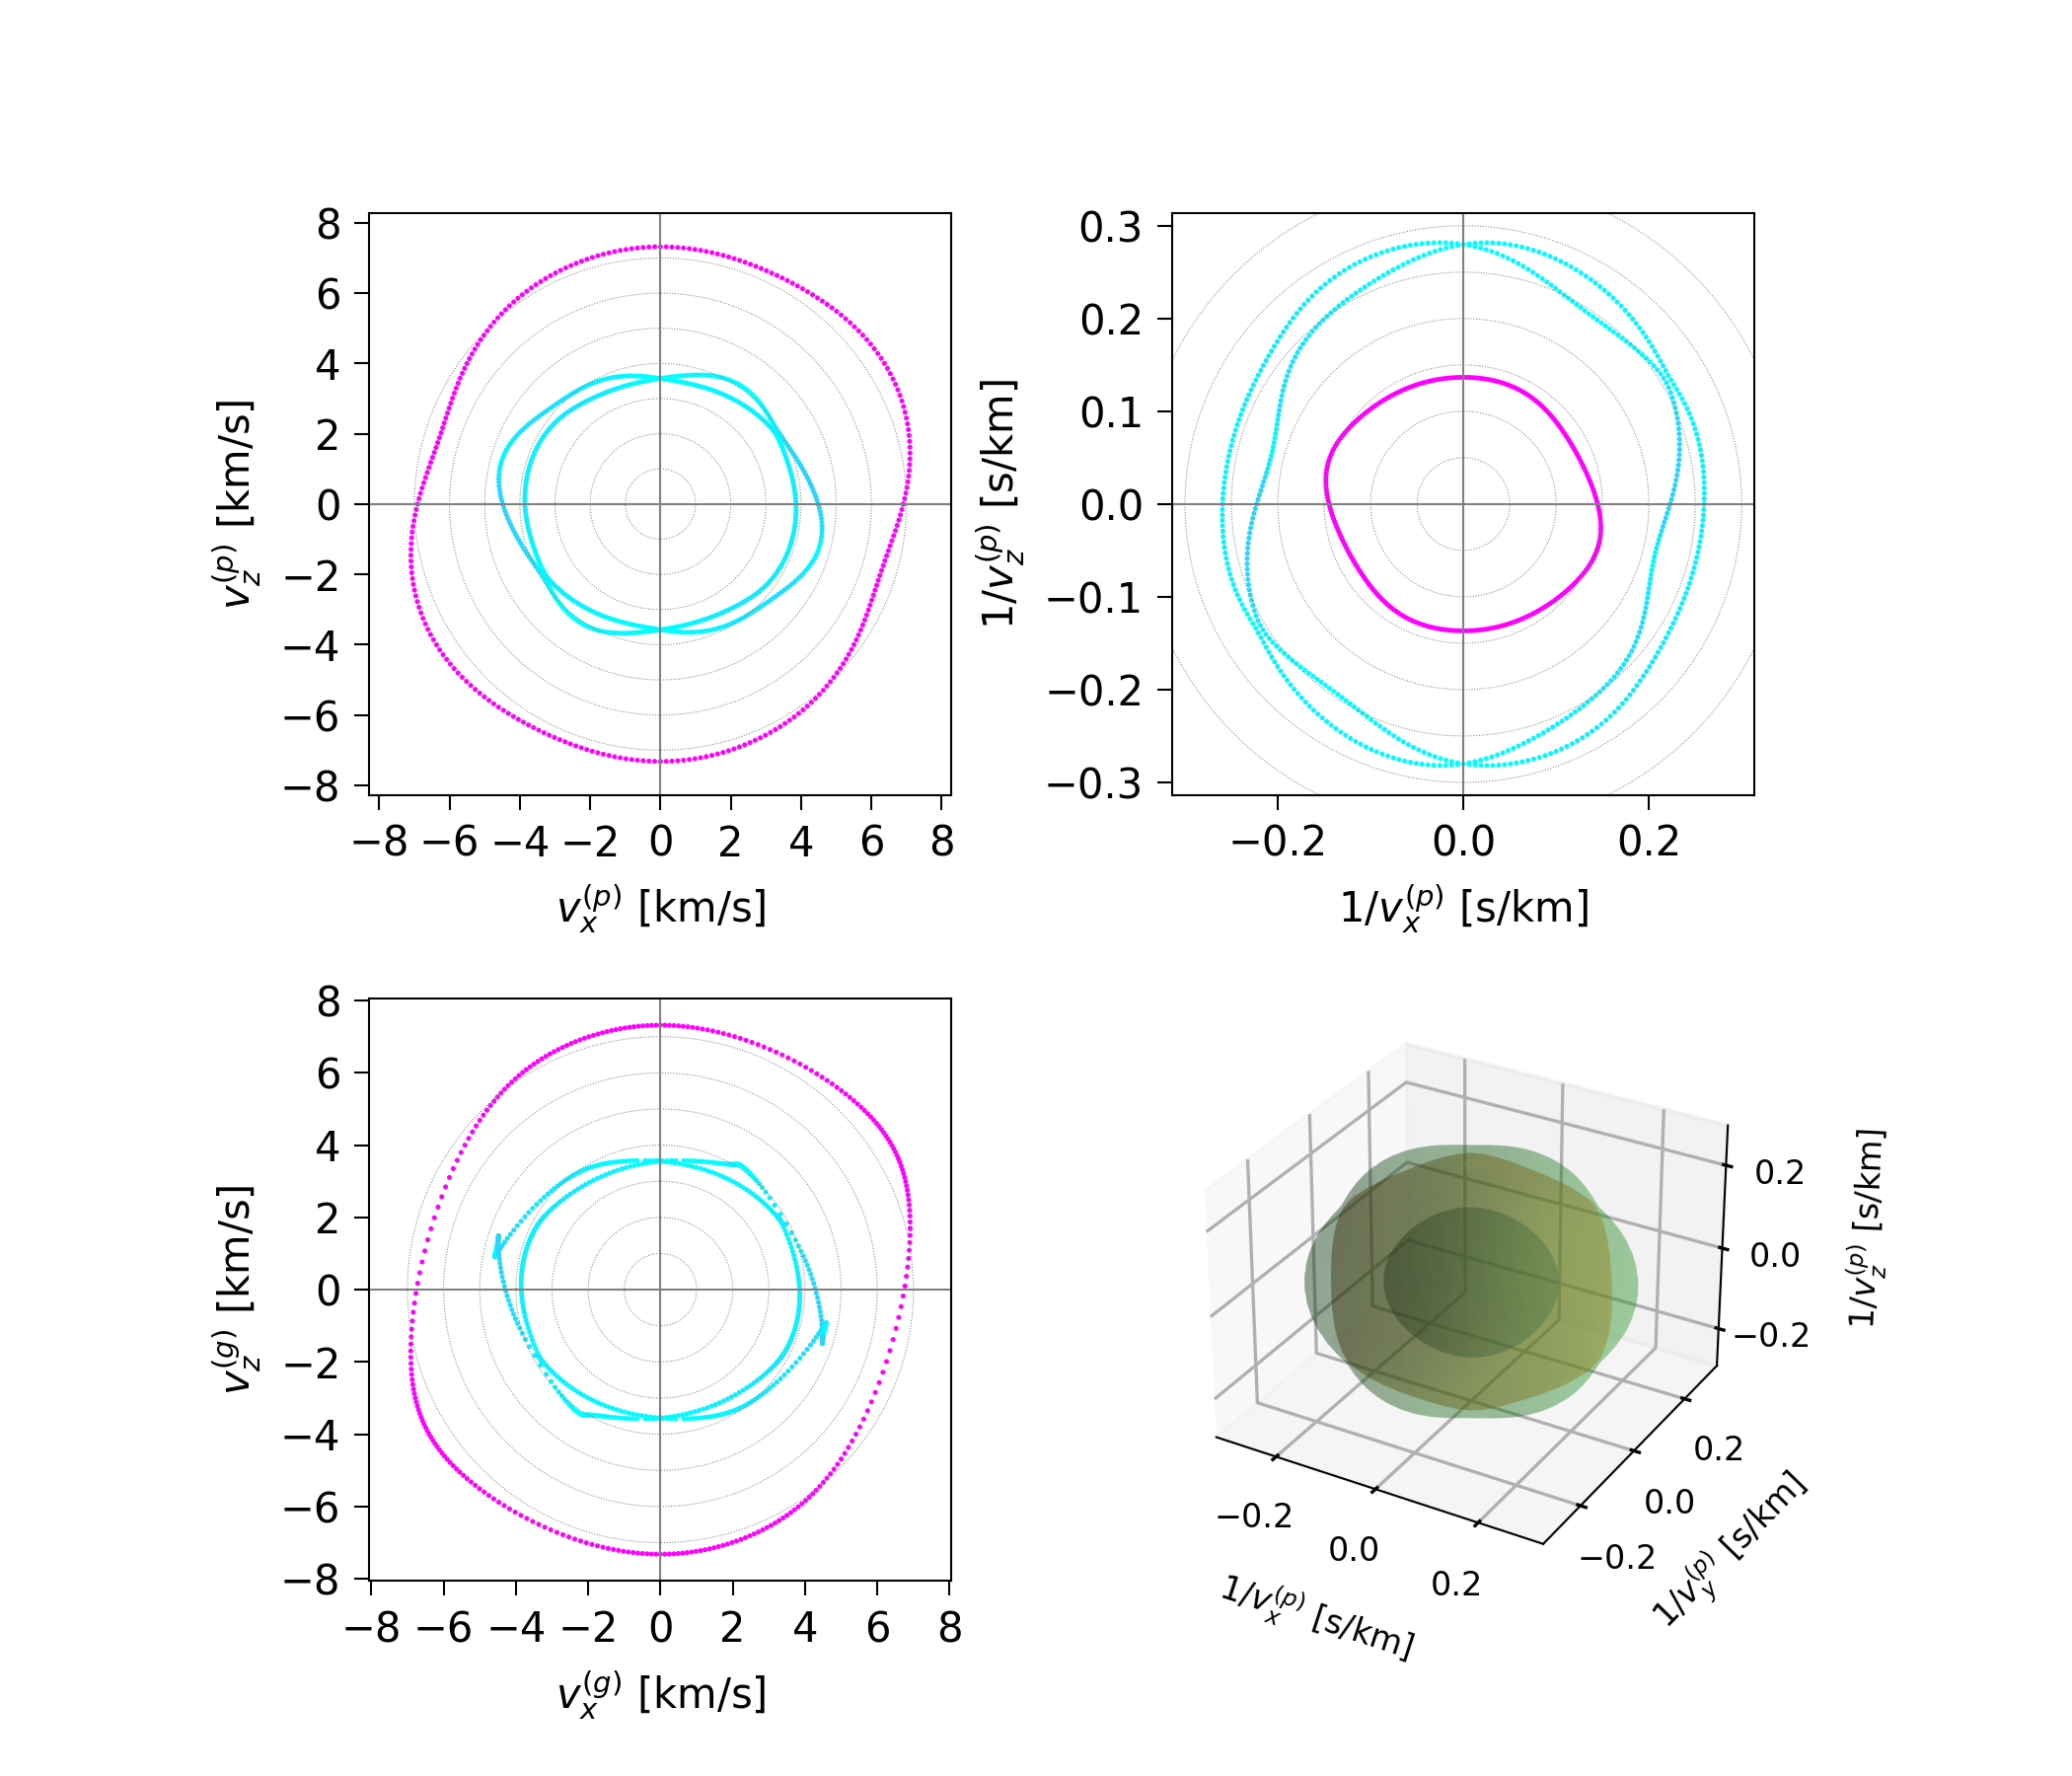

In [43]:
mat_LiNbO3_negx = mat_LiNbO3_nat.copy()
mat_LiNbO3_negx.set_orientation('negx-cut')

mat_LiNbO3_negx.enable_piezoelectric_effects()
imgon = mat_LiNbO3_negx.plot_bulk_dispersion_all("tmp_negxcut_piezo_on", show_poln=False)
display(Image(imgon, width=500))

This should give Auld Fig. 8.12.

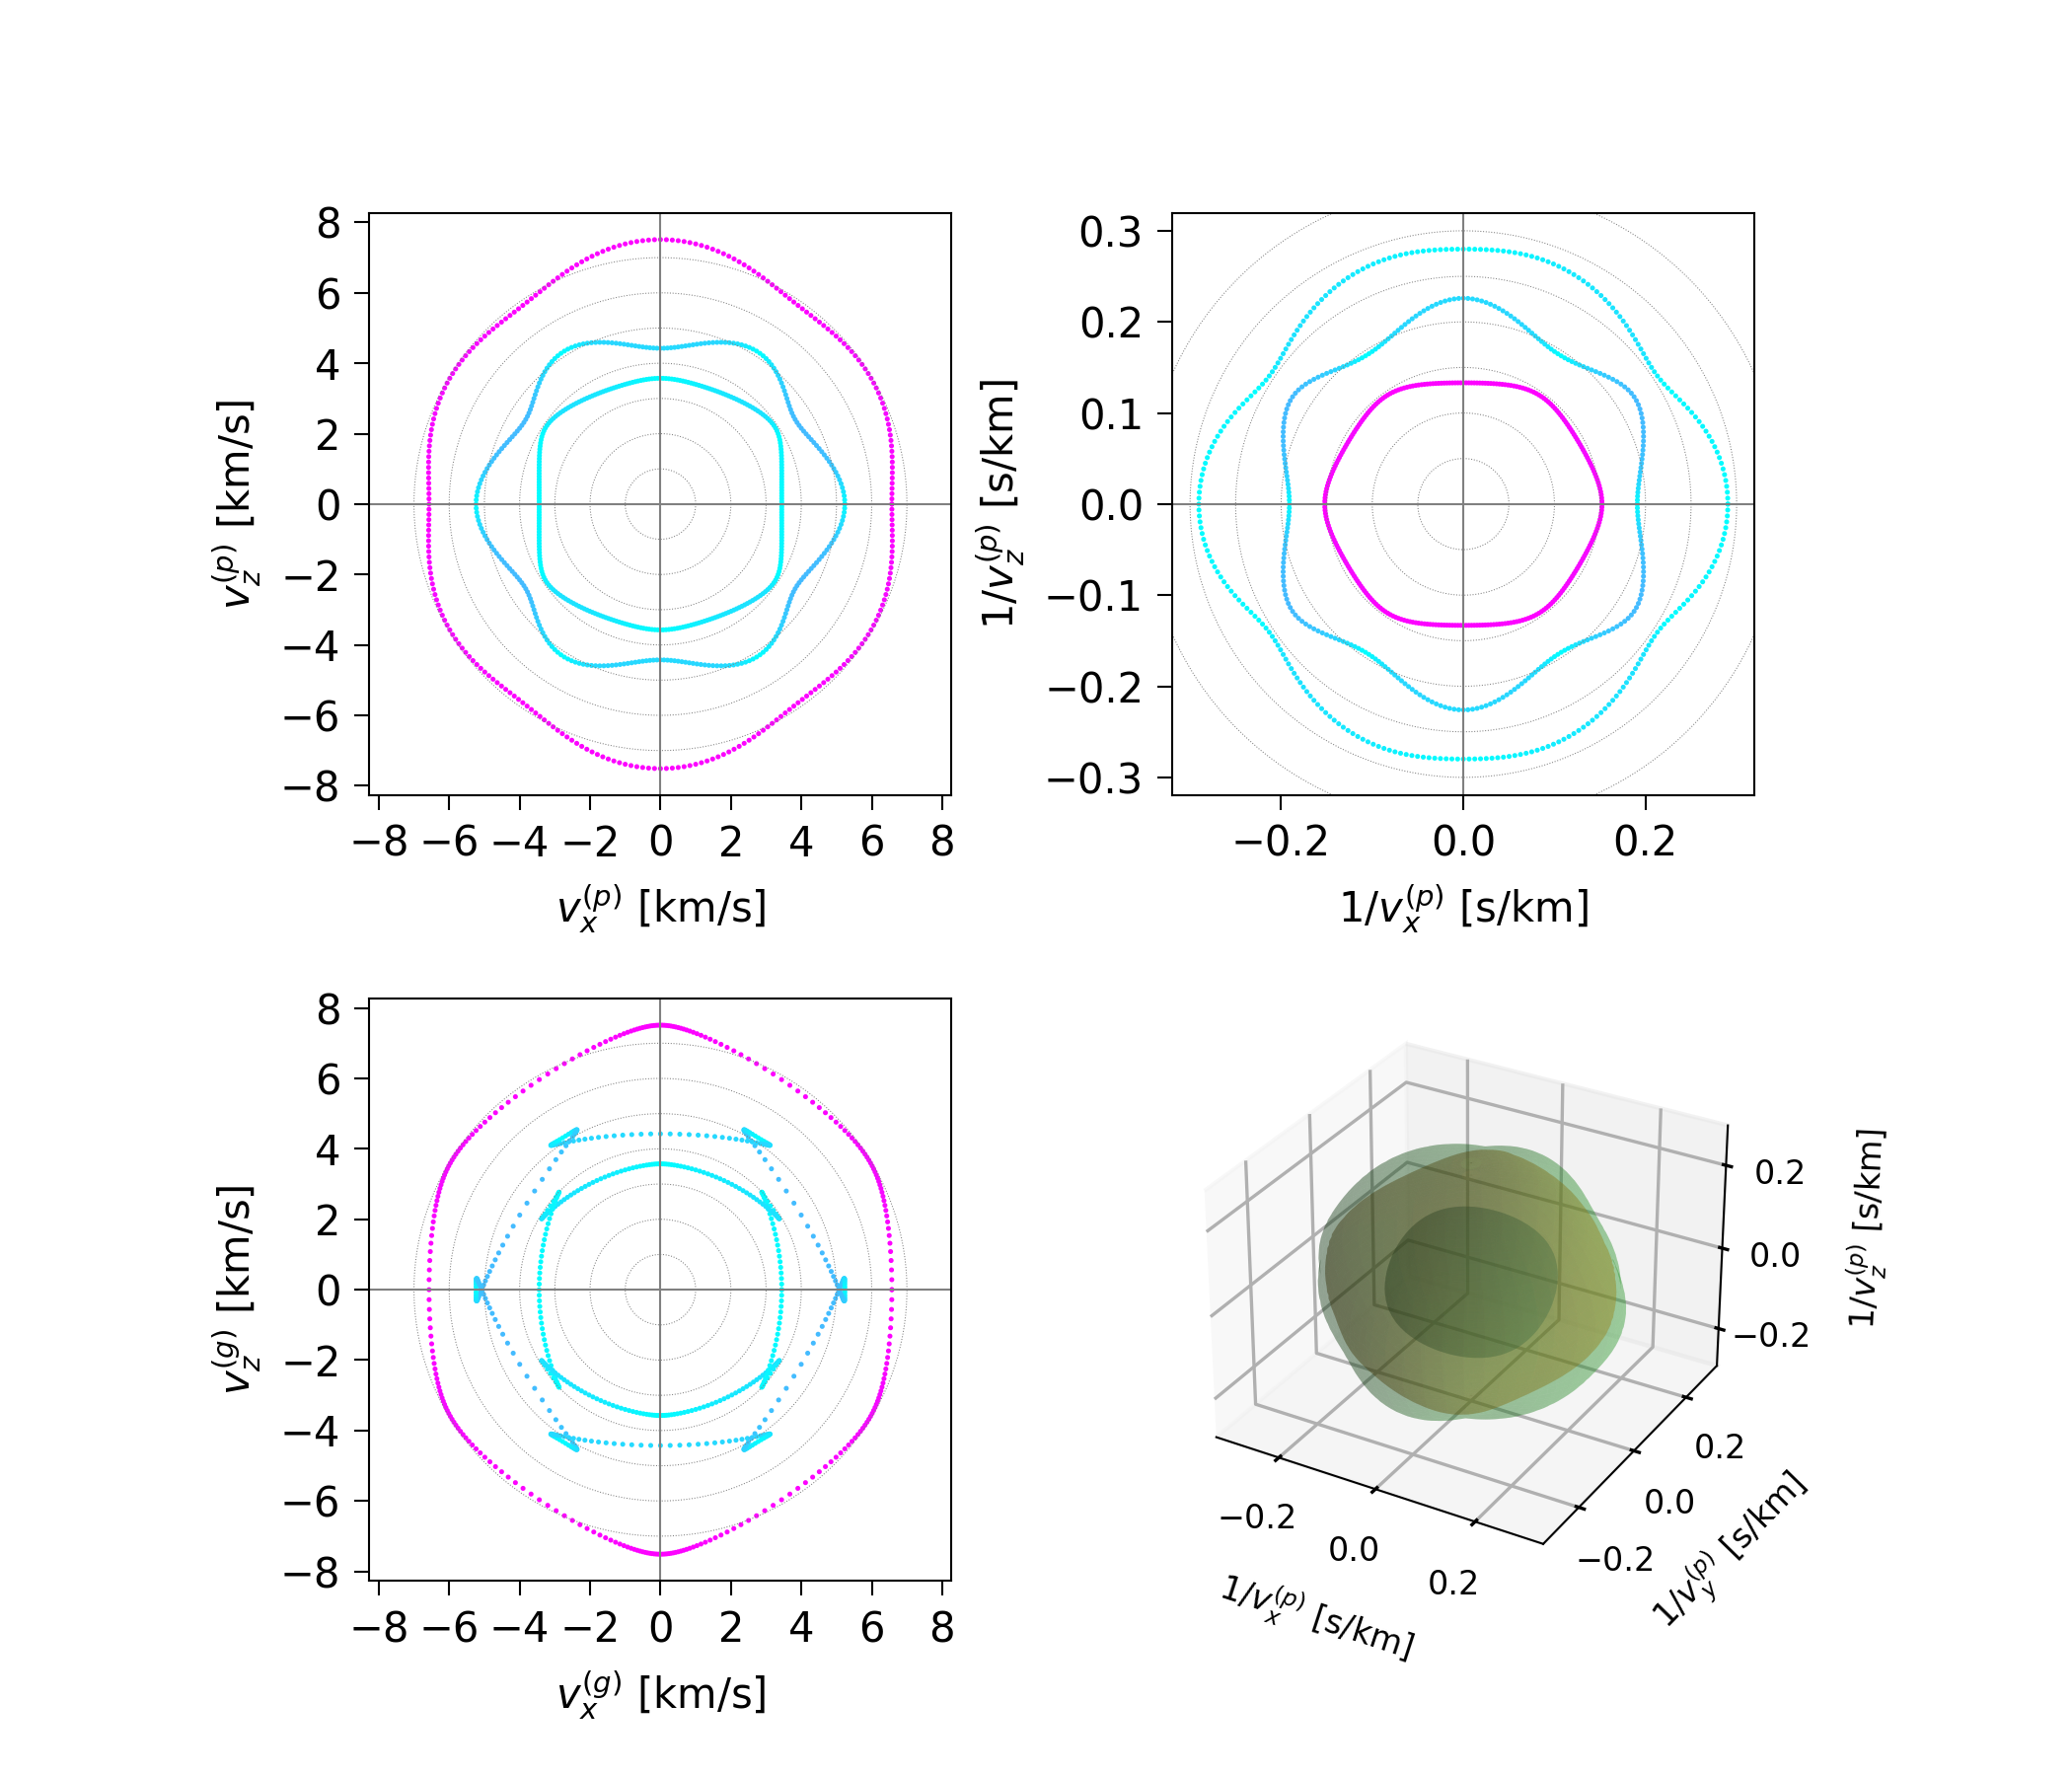

In [44]:
mat_LiNbO3_z = mat_LiNbO3.copy()
mat_LiNbO3_z.set_orientation('z-cut')

mat_LiNbO3_z.enable_piezoelectric_effects()
imgon = mat_LiNbO3_z.plot_bulk_dispersion_all("tmp_negxcut_piezo_on", show_poln=False)
display(Image(imgon, width=500))

# Other material comparisons

Cubic material: GaAs

In [45]:
mat_GaAs = materials.make_material("GaAs_1970_Auld")

The slowness plot (top-right) below reproduces Fig. 7.2 of Auld vol. 1, while
the ray surface plot (lower-left) reproduces Fig. 7.9.

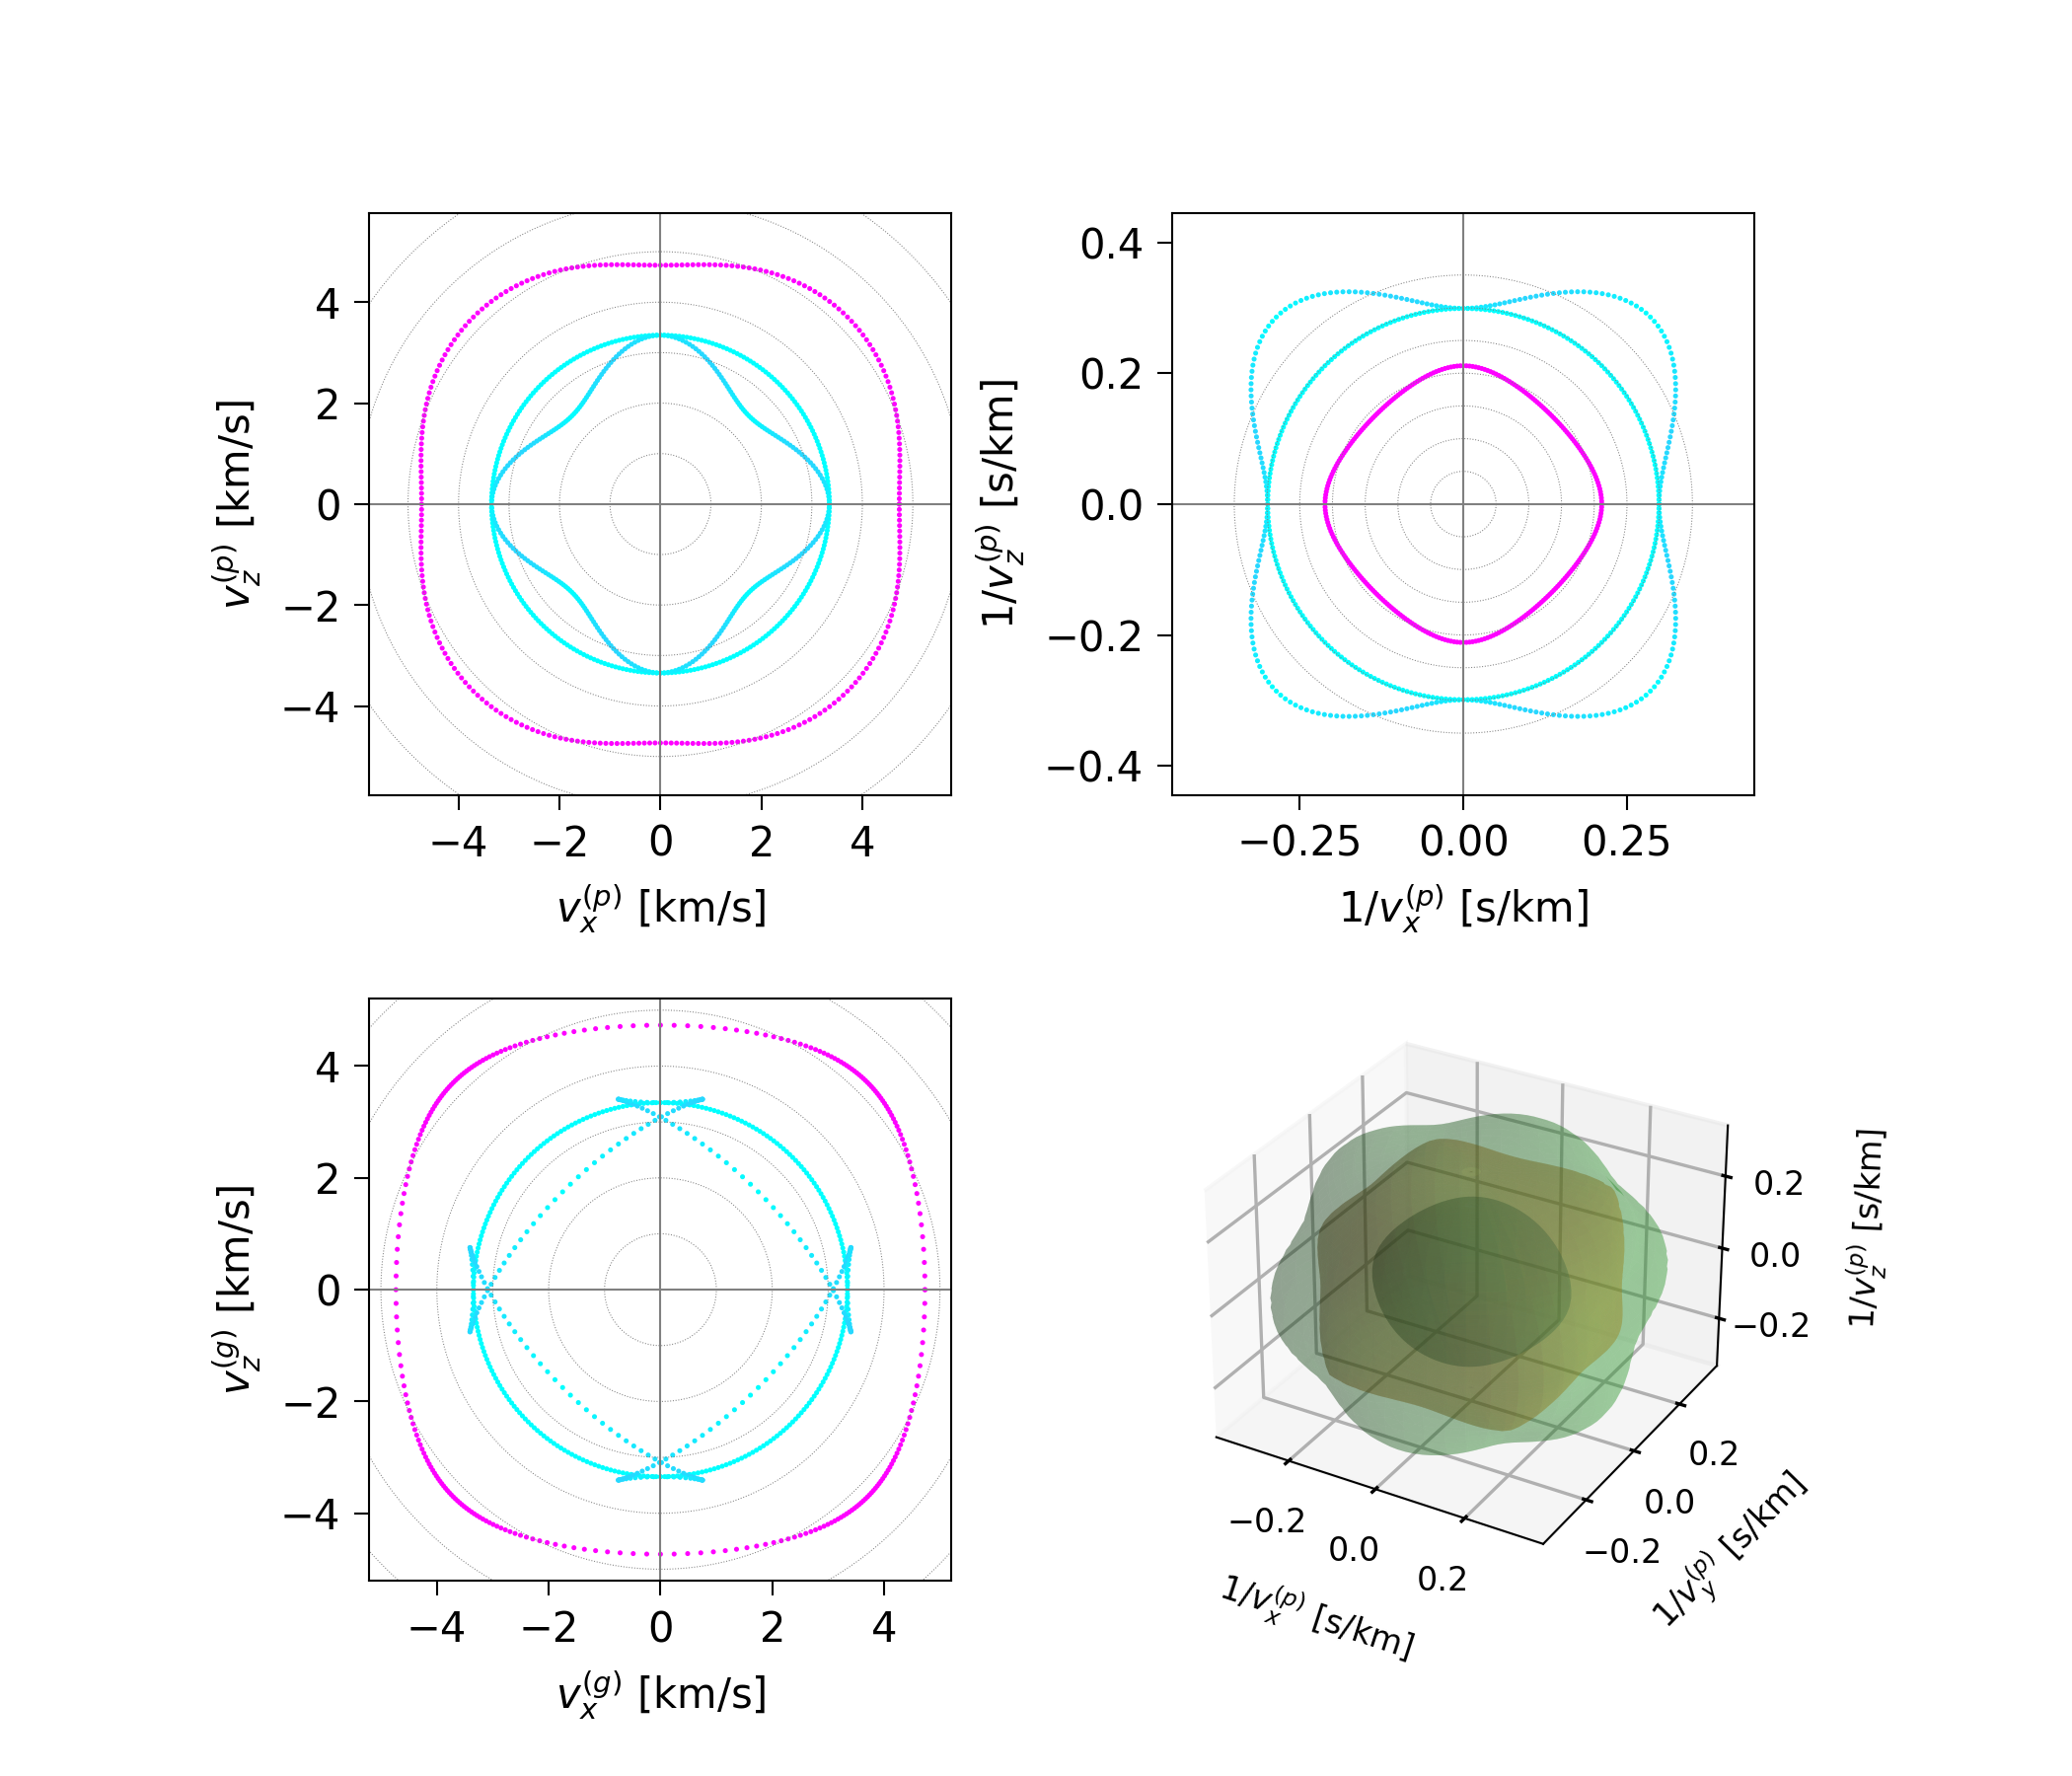

In [46]:
mat_GaAs.disable_piezoelectric_effects()

fimg = mat_GaAs.plot_bulk_dispersion_all("tmp_defcut", show_poln=False)
display(Image(fimg, height=500))

In [47]:

imggaasy = mat_GaAs.plot_bulk_dispersion_ivp("tmp_zcut_piezo_on", show_poln=True, flip_x=True)
img_pair(imggaasy, "images/auld_fig7_2.png",  'Y-cut, piezo off - NumBAT', 'Y-cut, piezo off - Auld Fig. 7.2')

imggaasy = mat_GaAs.plot_bulk_dispersion_vg("tmp_zcut_piezo_on", show_poln=True, flip_x=True)
img_pair(imggaasy, "images/auld_fig7_9.png",  'Y-cut, piezo off - NumBAT', 'Y-cut, piezo off - Auld Fig. 7.9')



Now let's reproduce Fig. 7.3.
To preserve the $z$ axis, rotate $[1,-1,0]$ into the $x$ axis and $[1,-1,1]$ into the horizontal plane, 
we need a $\pi/4$ rotation around $z$: 

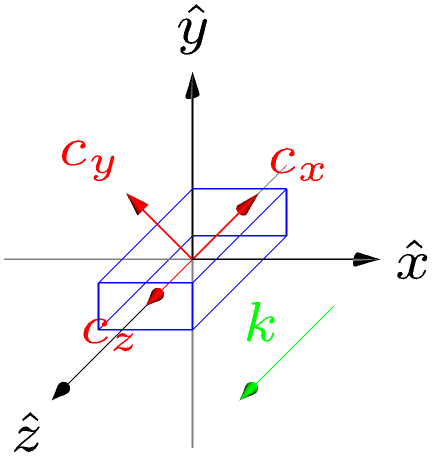

In [48]:
mat_rot = mat_GaAs.copy()
mat_rot.rotate([0,0,1], np.pi/4)
fimg = mat_rot.make_crystal_axes_plot('ttx')
display(Image(fimg, width=300))

In [49]:
imggaasrot1 = mat_rot.plot_bulk_dispersion_ivp("tmp_rot1_piezo_on", show_poln=True, flip_x=True)
img_pair(imggaasrot1, "images/auld_fig7_3.png",  'rotatedcut, piezo off - NumBAT', 'rotated, piezo off - Auld Fig. 7.3')

Hexagonal material: Cadmium sulfide

In [50]:
mat_CdS = materials.make_material("CdS_1973_Auld")
mat_CdS.disable_piezoelectric_effects()
mat_CdS.set_orientation('x-cut')
imgcds = mat_CdS.plot_bulk_dispersion_ivp("tmp_cds_xcut_piezo-off", show_poln=True, flip_x=True)
img_pair(imgcds, "images/auld_fig7_6.png",  'X-cut CdS, piezo off - NumBAT', 'X-cut, piezo off - Auld Fig. 7.2')

We rotate to the $z$-cut orientation to get a dispersion cut through the horizontal symmetry plane.

The slowness curve (top-right) then reproduces Auld Fig. 7.6.

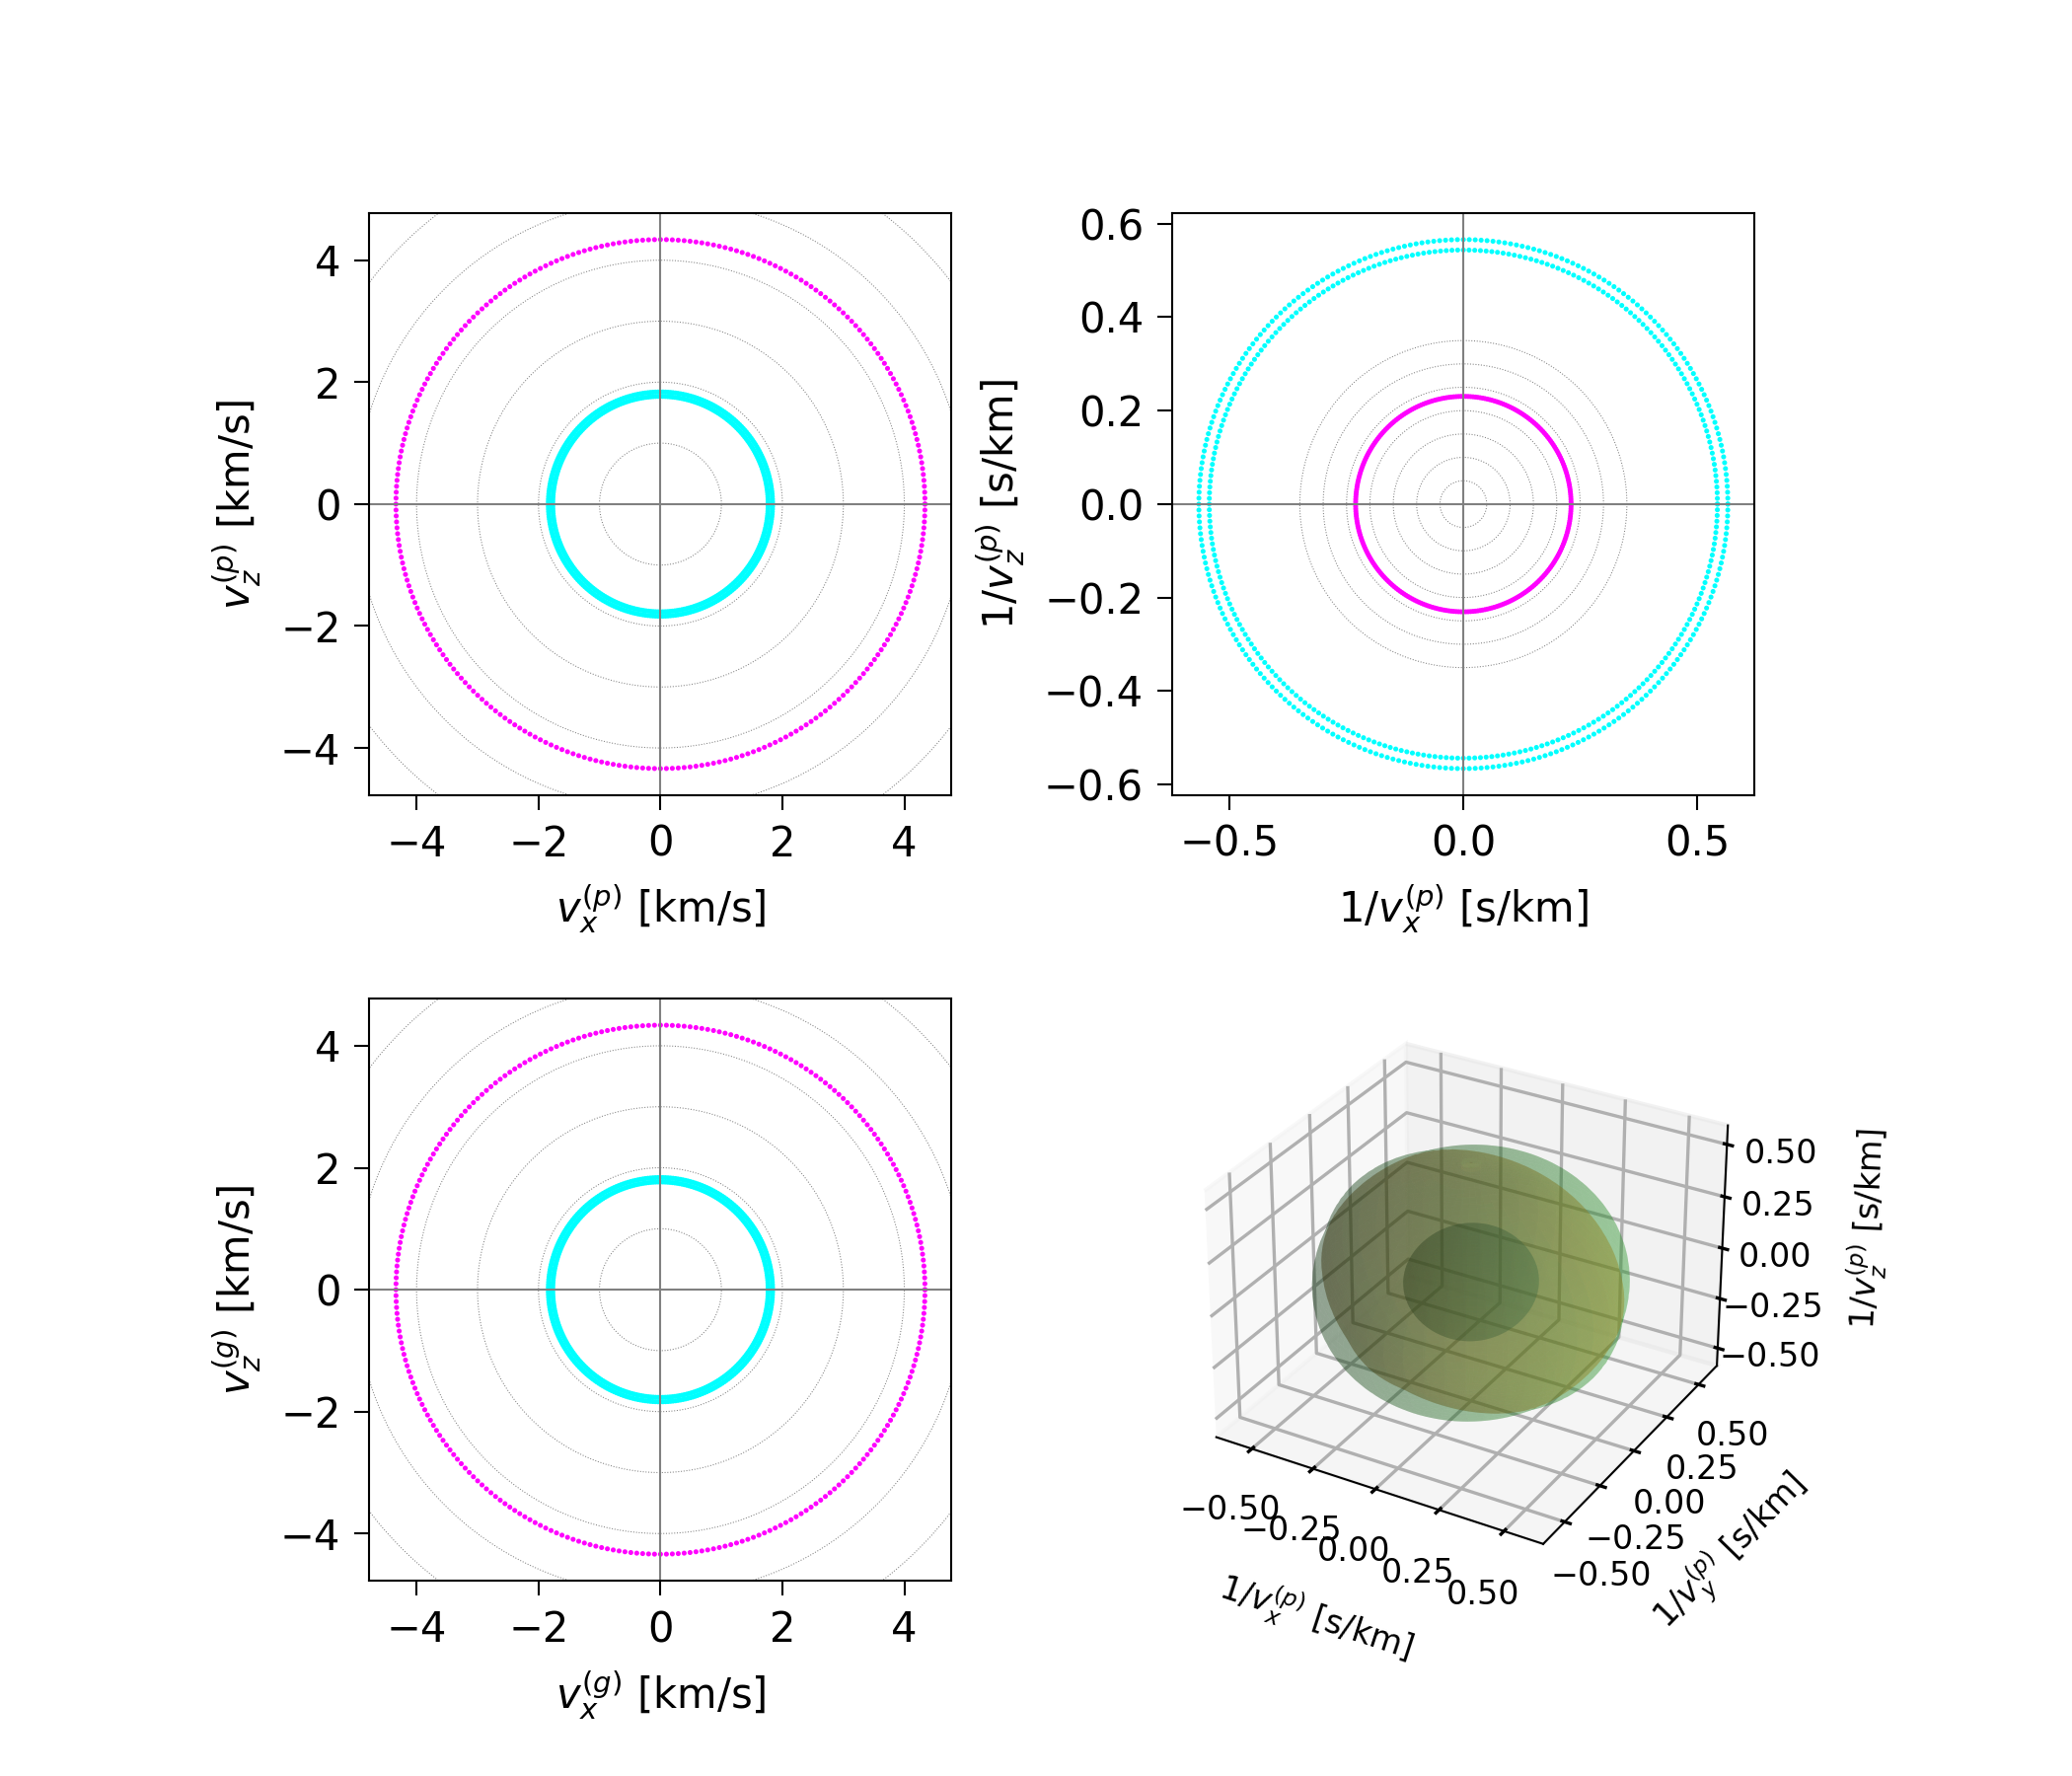

In [51]:
mat_CdS.set_orientation('z-cut')
fimg = mat_CdS.plot_bulk_dispersion_all("tmp_defcut", show_poln=False)
display(Image(fimg, width=600))